In [1]:
#BASIC LIBRARIES TO BE NEEDED
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

In [2]:
tf.set_random_seed(101)

### READ DATASET RAIN

In [3]:
dataset = pd.read_csv('dataset_rain.csv')

In [4]:
dataset.columns

Index(['Day', 'Month', 'Year', 'MinPressure', 'MaxPressure', 'MinVapour',
       'MaxVapour', 'MinRelativeHumidity', 'MaxRelativeHumidity',
       'MinTemperature', 'MaxTemperature', 'Rain', 'MinRadiation',
       'MaxRadiation'],
      dtype='object')

In [5]:
dataset.corr()

,Day,Month,Year,MinPressure,MaxPressure,MinVapour,MaxVapour,MinRelativeHumidity,MaxRelativeHumidity,MinTemperature,MaxTemperature,Rain,MinRadiation,MaxRadiation
Day,1.000000,0.011337,0.005534,-0.026737,-0.023597,0.012438,-0.009908,0.020194,0.001810,-0.007138,-0.007970,-0.025246,0.031925,-0.012527
Month,0.011337,1.000000,-0.007650,-0.015876,-0.042033,0.270620,0.195072,0.415881,0.190686,-0.025137,0.156416,0.081969,-0.182563,0.042846
Year,0.005534,-0.007650,1.000000,-0.003431,-0.010428,0.089055,0.083138,0.094404,0.058577,0.052545,0.031824,0.000759,-0.039054,-0.022513
MinPressure,-0.026737,-0.015876,-0.003431,1.000000,0.981270,-0.808819,-0.825122,-0.476431,-0.361314,-0.614129,-0.825390,-0.294619,-0.251876,-0.588964
MaxPressure,-0.023597,-0.042033,-0.010428,0.981270,1.000000,-0.812156,-0.828078,-0.518096,-0.396837,-0.573611,-0.817011,-0.317833,-0.205878,-0.595545
MinVapour,0.012438,0.270620,0.089055,-0.808819,-0.812156,1.000000,0.900799,0.741861,0.492866,0.575405,0.859213,0.280680,0.164914,0.602115
MaxVapour,-0.009908,0.195072,0.083138,-0.825122,-0.828078,0.900799,1.000000,0.575771,0.551166,0.684524,0.920069,0.239333,0.233987,0.592770
MinRelativeHumidity,0.020194,0.415881,0.094404,-0.476431,-0.518096,0.741861,0.575771,1.000000,0.637929,-0.004094,0.438386,0.378737,-0.244592,0.418813
MaxRelativeHumidity,0.001810,0.190686,0.058577,-0.361314,-0.396837,0.492866,0.551166,0.637929,1.000000,-0.030143,0.309932,0.353827,-0.316643,0.321599
MinTemperature,-0.007138,-0.025137,0.052545,-0.614129,-0.573611,0.575405,0.684524,-0.004094,-0.030143,1.000000,0.788499,0.000678,0.552022,0.359069


## Normalizingg

In [6]:
cols_to_norm =['Day','Month', 'Year', 'MinPressure', 'MaxPressure', 'MinVapour',
     'MaxVapour', 'MinRelativeHumidity', 'MaxRelativeHumidity',
   'MinTemperature', 'MaxTemperature','Rain']

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
def normal(x):
   return (x-x.min())/(x.max()-x.min())

In [10]:
dataset[cols_to_norm] = dataset[cols_to_norm].apply(lambda x: normal(x))

In [11]:
#dataset[2000:2100]

## Feature columns distinguising

In [105]:
day = tf.feature_column.numeric_column('Day')
month = tf.feature_column.numeric_column('Month')
year = tf.feature_column.numeric_column('Year')
minpressure = tf.feature_column.numeric_column('MinPressure')
maxpressure = tf.feature_column.numeric_column('MaxPressure')
minvapour = tf.feature_column.numeric_column('MinVapour')
maxvapour = tf.feature_column.numeric_column('MaxVapour')
minrh = tf.feature_column.numeric_column('MinRelativeHumidity')
maxrh = tf.feature_column.numeric_column('MaxRelativeHumidity')
mintemp = tf.feature_column.numeric_column('MinTemperature')
maxtemp = tf.feature_column.numeric_column('MaxTemperature')

In [106]:
feat_col = [minpressure,maxpressure,minvapour,maxvapour,minrh,maxrh,maxtemp]

### SPLIT

In [107]:
x_data = dataset.iloc[:, :-3]

In [108]:
y_data = dataset['Rain']

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=101)

In [111]:
sess = tf.InteractiveSession()

### MODEL TRAINING & EVALUATING

In [112]:
input_func = tf.estimator.inputs.pandas_input_fn(x_train,y_train,batch_size=15,num_epochs=500,shuffle=True)

In [113]:
model = tf.estimator.DNNRegressor(hidden_units=[100,95,105,98,102,100],feature_columns=feat_col)  
#model = tf.estimator.LinearRegressor(feature_columns=feat_col, optimizer='Adagrad')


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_session_config': None, '_tf_random_seed': 1, '_log_step_count_steps': 100, '_model_dir': 'C:\\Users\\Debraj\\AppData\\Local\\Temp\\tmpd8kdtzl5', '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_keep_checkpoint_every_n_hours': 10000, '_keep_checkpoint_max': 5, '_save_summary_steps': 100}


In [114]:
model.train(input_fn=input_func,steps=5000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\Debraj\AppData\Local\Temp\tmpd8kdtzl5\model.ckpt.
INFO:tensorflow:loss = 0.0207482, step = 1
INFO:tensorflow:global_step/sec: 271.348
INFO:tensorflow:loss = 0.0208185, step = 101 (0.371 sec)
INFO:tensorflow:global_step/sec: 268.571
INFO:tensorflow:loss = 0.00970659, step = 201 (0.373 sec)
INFO:tensorflow:global_step/sec: 318.651
INFO:tensorflow:loss = 0.100791, step = 301 (0.314 sec)
INFO:tensorflow:global_step/sec: 310.391
INFO:tensorflow:loss = 0.00916555, step = 401 (0.322 sec)
INFO:tensorflow:global_step/sec: 316.999
INFO:tensorflow:loss = 0.0163831, step = 501 (0.315 sec)
INFO:tensorflow:global_step/sec: 322.354
INFO:tensorflow:loss = 0.00564291, step = 601 (0.310 sec)
INFO:tensorflow:global_step/sec: 261.106
INFO:tensorflow:loss = 0.0496104, step = 701 (0.384 sec)
INFO:tensorflow:global_step/sec: 308.483
INFO:tensorflow:loss = 0.0246083, step = 801 (0.326 sec)
INFO:tensorflow:global

In [115]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x_test,y_test,batch_size=8,num_epochs=1,shuffle=False)

In [116]:
model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-03-16-16:27:05
INFO:tensorflow:Restoring parameters from C:\Users\Debraj\AppData\Local\Temp\tmpd8kdtzl5\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2018-03-16-16:27:06
INFO:tensorflow:Saving dict for global step 5000: average_loss = 0.00374024, global_step = 5000, loss = 0.0296832


{'average_loss': 0.0037402429, 'global_step': 5000, 'loss': 0.029683204}

In [117]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x_test,batch_size=8,num_epochs=1,shuffle=False)

In [118]:
pred_gen = model.predict(pred_input_func)

In [119]:
type(pred_gen)

generator

In [120]:
predictions = list(pred_gen)

INFO:tensorflow:Restoring parameters from C:\Users\Debraj\AppData\Local\Temp\tmpd8kdtzl5\model.ckpt-5000


In [121]:
y_train.size

1738

In [122]:
predictions

[{'predictions': array([ 0.03413254], dtype=float32)},
 {'predictions': array([-0.00121401], dtype=float32)},
 {'predictions': array([ -1.43721700e-05], dtype=float32)},
 {'predictions': array([ 0.00238716], dtype=float32)},
 {'predictions': array([  4.09483910e-05], dtype=float32)},
 {'predictions': array([ 0.39142531], dtype=float32)},
 {'predictions': array([ 0.06875932], dtype=float32)},
 {'predictions': array([-0.00497016], dtype=float32)},
 {'predictions': array([-0.00191813], dtype=float32)},
 {'predictions': array([ 0.00692844], dtype=float32)},
 {'predictions': array([-0.00054868], dtype=float32)},
 {'predictions': array([-0.00199756], dtype=float32)},
 {'predictions': array([ 0.00449917], dtype=float32)},
 {'predictions': array([-0.00227152], dtype=float32)},
 {'predictions': array([ 0.10305703], dtype=float32)},
 {'predictions': array([ 0.00933222], dtype=float32)},
 {'predictions': array([-0.00044885], dtype=float32)},
 {'predictions': array([ 0.18677168], dtype=float32)},


In [123]:
p = [p['predictions'][0] for p in predictions]

In [124]:
mse = metrics.mean_squared_error(y_test,p)
mae = metrics.mean_absolute_error(y_test,p)
msle = metrics.mean_squared_log_error(y_test,p)
med_e=metrics.median_absolute_error(y_test,p)
print(mae*100)

2.41476795046


In [125]:
p = np.asarray(p)

In [126]:
y_test=np.asarray(y_test)

In [127]:
y_test[0:20]

array([ 0.04562738,  0.        ,  0.        ,  0.        ,  0.        ,
        0.19500272,  0.26072787,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.11787072,
        0.        ,  0.        ,  0.22542097,  0.06952743,  0.        ])

In [128]:
p[0:20]

array([  3.41325402e-02,  -1.21401250e-03,  -1.43721700e-05,
         2.38715857e-03,   4.09483910e-05,   3.91425312e-01,
         6.87593222e-02,  -4.97016311e-03,  -1.91812962e-03,
         6.92844391e-03,  -5.48675656e-04,  -1.99756026e-03,
         4.49916720e-03,  -2.27151811e-03,   1.03057027e-01,
         9.33221728e-03,  -4.48852777e-04,   1.86771676e-01,
         3.83107886e-02,  -1.61523372e-03], dtype=float32)

In [129]:
count=0
sum=0
for i in range(0,746):
    if(y_test[i]-p[i]<0.05 and y_test[i]-p[i]>-0.05):
        count=count+1
print(count)
print(count/746)

658
0.8820375335120644


## PERFORMANCE & RESULT

In [145]:
count=0
error=0
for i in range(0,746):
   error=error + ((y_test[i]-p[i])**2)
mse = error/746
rmse = mse**(1/2)


from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
print("r sqaured = ",r2_score(y_test, p)*100)
print("mse = ",mean_squared_error(y_test,p)*100)
print("meanae = ",mean_absolute_error(y_test,p)*100)
print("meadianae = ",median_absolute_error(y_test,p)*100)


r sqaured =  37.1525206722
mse =  0.37402428264
meanae =  2.41476795046
meadianae =  0.470951190628


In [131]:
y_test.size

746

In [132]:
X=x_test['MinPressure']

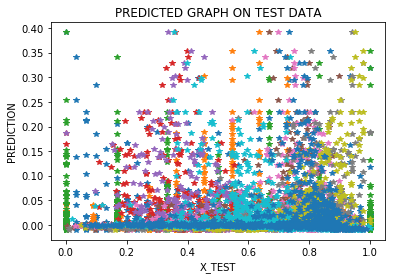

In [133]:
plt.plot(x_test,p,'*')
plt.xlabel("X_TEST")
plt.ylabel("PREDICTION")
plt.title("PREDICTED GRAPH ON TEST DATA")

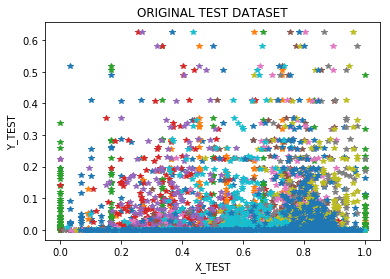

In [134]:
plt.plot(x_test,y_test,'*')
plt.xlabel("X_TEST")
plt.ylabel("Y_TEST")
plt.title("ORIGINAL TEST DATASET")

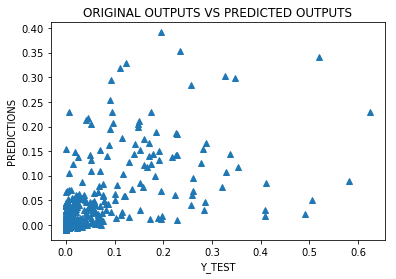

In [135]:
plt.plot(y_test,p,'^')
plt.xlabel("Y_TEST")
plt.ylabel("PREDICTIONS")
plt.title("ORIGINAL OUTPUTS VS PREDICTED OUTPUTS")

## 10 Max and 10 Min values

In [136]:
y_test.max()

0.62466051059206951

In [137]:
p.max()

0.39142531

In [138]:
y_test.min()

0.0

In [139]:
p.min()

-0.010284618

In [140]:
y_test.mean()

0.030102971779237594

In [141]:
p.mean()

0.02258978

In [142]:
y_test.std()

0.077144677429316563

In [143]:
p.std()

0.055612743